<center><h1>Diabetes Prediction</h1></center>


# Load Data and Create DataFrame

In [ ]:
import numpy as np
import pandas as pd
df=pd.read_csv('/content/diabetes.csv')
print(df)

     Pregnancies  Glucose  BloodPressure  SkinThickness  Insulin   BMI  \
0              6      148             72             35        0  33.6   
1              1       85             66             29        0  26.6   
2              8      183             64              0        0  23.3   
3              1       89             66             23       94  28.1   
4              0      137             40             35      168  43.1   
..           ...      ...            ...            ...      ...   ...   
763           10      101             76             48      180  32.9   
764            2      122             70             27        0  36.8   
765            5      121             72             23      112  26.2   
766            1      126             60              0        0  30.1   
767            1       93             70             31        0  30.4   

     DiabetesPedigreeFunction  Age  Outcome  
0                       0.627   50        1  
1                  

# Data Preprocessing

**Printing first 5 rows**

In [ ]:
print(df.head())

   Pregnancies  Glucose  BloodPressure  SkinThickness  Insulin   BMI  \
0            6      148             72             35        0  33.6   
1            1       85             66             29        0  26.6   
2            8      183             64              0        0  23.3   
3            1       89             66             23       94  28.1   
4            0      137             40             35      168  43.1   

   DiabetesPedigreeFunction  Age  Outcome  
0                     0.627   50        1  
1                     0.351   31        0  
2                     0.672   32        1  
3                     0.167   21        0  
4                     2.288   33        1  


**Printing last 5 rows**

In [ ]:
print(df.tail())

     Pregnancies  Glucose  BloodPressure  SkinThickness  Insulin   BMI  \
763           10      101             76             48      180  32.9   
764            2      122             70             27        0  36.8   
765            5      121             72             23      112  26.2   
766            1      126             60              0        0  30.1   
767            1       93             70             31        0  30.4   

     DiabetesPedigreeFunction  Age  Outcome  
763                     0.171   63        0  
764                     0.340   27        0  
765                     0.245   30        0  
766                     0.349   47        1  
767                     0.315   23        0  


**Printing the count of output**

In [ ]:
a=df['Outcome'].value_counts()
a

0    500
1    268
Name: Outcome, dtype: int64

**Class Distribution Bar Chart**

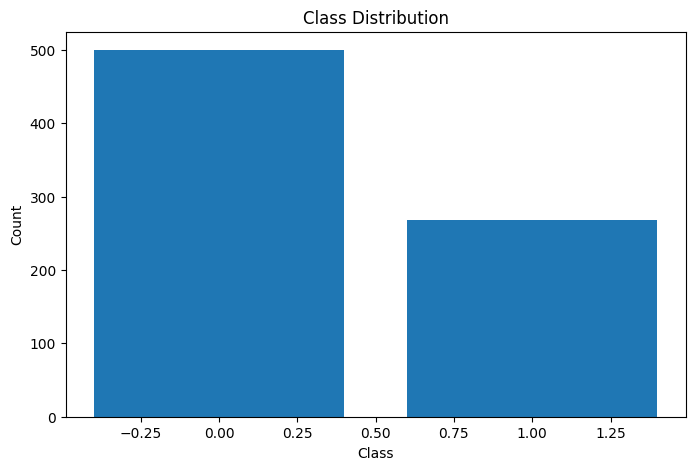

In [ ]:
import matplotlib.pyplot as plt
plt.figure(figsize=(8, 5))
plt.bar(a.index, a.values)
plt.xlabel('Class')
plt.ylabel('Count')
plt.title('Class Distribution')
plt.show()


**Printing the datatypes of each column**

In [ ]:
df.dtypes

Pregnancies                   int64
Glucose                       int64
BloodPressure                 int64
SkinThickness                 int64
Insulin                       int64
BMI                         float64
DiabetesPedigreeFunction    float64
Age                           int64
Outcome                       int64
dtype: object

**Printing the missing values**

In [ ]:
df.isna().sum()

Pregnancies                 0
Glucose                     0
BloodPressure               0
SkinThickness               0
Insulin                     0
BMI                         0
DiabetesPedigreeFunction    0
Age                         0
Outcome                     0
dtype: int64

**Seperate x as input feature**

In [ ]:
x=df.iloc[:,:-1]
print(x)

     Pregnancies  Glucose  BloodPressure  SkinThickness  Insulin   BMI  \
0              6      148             72             35        0  33.6   
1              1       85             66             29        0  26.6   
2              8      183             64              0        0  23.3   
3              1       89             66             23       94  28.1   
4              0      137             40             35      168  43.1   
..           ...      ...            ...            ...      ...   ...   
763           10      101             76             48      180  32.9   
764            2      122             70             27        0  36.8   
765            5      121             72             23      112  26.2   
766            1      126             60              0        0  30.1   
767            1       93             70             31        0  30.4   

     DiabetesPedigreeFunction  Age  
0                       0.627   50  
1                       0.351   31  


**y as class label**

In [ ]:
y=df.iloc[:,-1]
print(y)

0      1
1      0
2      1
3      0
4      1
      ..
763    0
764    0
765    0
766    1
767    0
Name: Outcome, Length: 768, dtype: int64


**Correlation matrix**

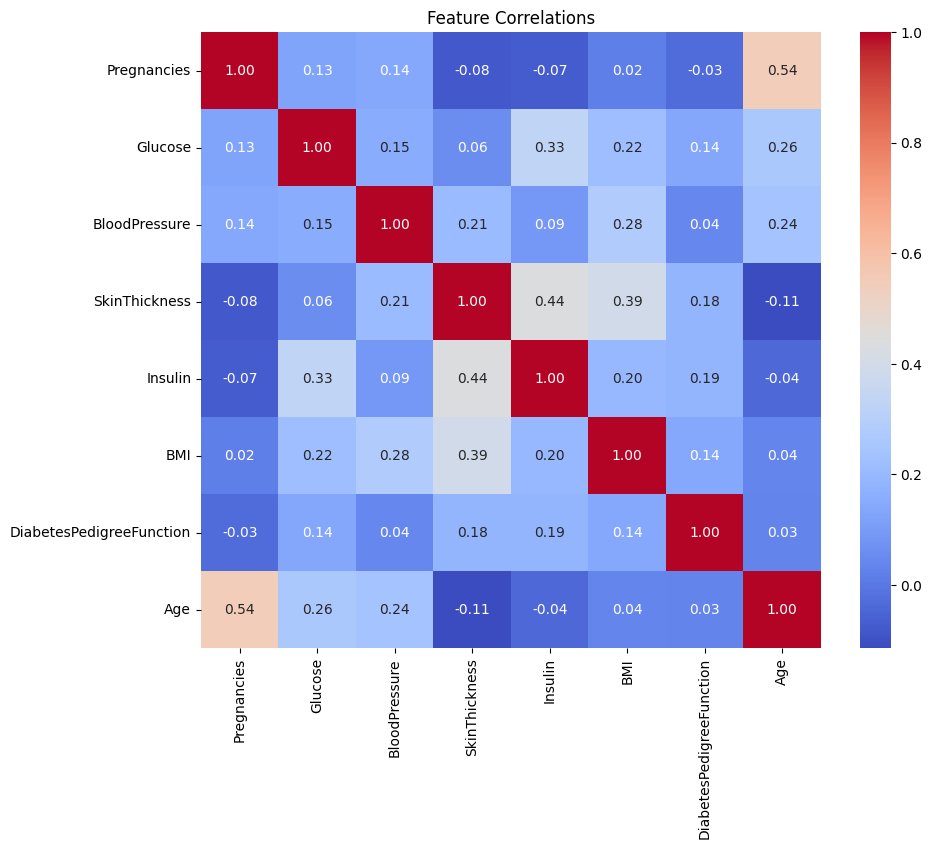

In [ ]:
import seaborn as sns
corr_matrix = x.corr()
plt.figure(figsize=(10, 8))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt='.2f')
plt.title('Feature Correlations')
plt.show()

**split the data into training and testing**

In [ ]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.20,random_state=1)

In [ ]:
print(x_train)

     Pregnancies  Glucose  BloodPressure  SkinThickness  Insulin   BMI  \
663            9      145             80             46      130  37.9   
712           10      129             62             36        0  41.2   
161            7      102             74             40      105  37.2   
509            8      120             78              0        0  25.0   
305            2      120             76             37      105  39.7   
..           ...      ...            ...            ...      ...   ...   
645            2      157             74             35      440  39.4   
715            7      187             50             33      392  33.9   
72            13      126             90              0        0  43.4   
235            4      171             72              0        0  43.6   
37             9      102             76             37        0  32.9   

     DiabetesPedigreeFunction  Age  
663                     0.637   40  
712                     0.441   38  


In [ ]:
print(x_test)

     Pregnancies  Glucose  BloodPressure  SkinThickness  Insulin   BMI  \
285            7      136             74             26      135  26.0   
101            1      151             60              0        0  26.1   
581            6      109             60             27        0  25.0   
352            3       61             82             28        0  34.4   
726            1      116             78             29      180  36.1   
..           ...      ...            ...            ...      ...   ...   
563            6       99             60             19       54  26.9   
318            3      115             66             39      140  38.1   
154            8      188             78              0        0  47.9   
684            5      136             82              0        0   0.0   
643            4       90              0              0        0  28.0   

     DiabetesPedigreeFunction  Age  
285                     0.647   51  
101                     0.179   22  


In [ ]:
y_train

663    1
712    1
161    0
509    0
305    0
      ..
645    0
715    1
72     1
235    1
37     1
Name: Outcome, Length: 614, dtype: int64

In [ ]:
y_test

285    0
101    0
581    0
352    0
726    0
      ..
563    0
318    0
154    1
684    0
643    0
Name: Outcome, Length: 154, dtype: int64

**Normalizing the data using StandardScaler**

In [ ]:
from sklearn.preprocessing import StandardScaler
scalar=StandardScaler()
scalar.fit(x_train)
x_train=scalar.transform(x_train)
x_test=scalar.transform(x_test)


In [ ]:
x_train

array([[ 1.51659096,  0.75052361,  0.56475624, ...,  0.79582546,
         0.52952571,  0.56793202],
       [ 1.81201827,  0.24475163, -0.34790438, ...,  1.22865369,
        -0.06968859,  0.39844951],
       [ 0.92573636, -0.60873859,  0.26053603, ...,  0.70401341,
        -0.79424873,  0.99163829],
       ...,
       [ 2.69830017,  0.14991938,  1.07178992, ...,  1.51720584,
         0.36443605,  0.73741453],
       [ 0.03945446,  1.57240307,  0.1591293 , ...,  1.54343785,
         0.04648561, -0.61844554],
       [ 1.51659096, -0.60873859,  0.36194277, ...,  0.14002512,
         0.61512775,  1.07637954]])

In [ ]:
x_test

array([[ 0.92573636,  0.46602687,  0.26053603, ..., -0.76497935,
         0.56009786,  1.50008581],
       [-0.84682744,  0.9401881 , -0.44931111, ..., -0.75186334,
        -0.87067912, -0.95741055],
       [ 0.63030906, -0.38746335, -0.44931111, ..., -0.89613942,
        -0.78813429, -0.53370428],
       ...,
       [ 1.22116366,  2.1097858 ,  0.46334951, ...,  2.10742614,
        -0.99908218,  0.82215578],
       [ 0.33488176,  0.46602687,  0.66616298, ..., -4.17514112,
         0.53869735,  3.02542839],
       [ 0.03945446, -0.98806757, -3.49151318, ..., -0.50265921,
         0.44698088, -0.19473927]])

# Model Creation

**Created model using Gaussian Naive Bayes Algorithm**

In [ ]:
from sklearn.naive_bayes import GaussianNB
model=GaussianNB()
model.fit(x_train,y_train)
y_pred=model.predict(x_test)
y_pred


array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 1, 0, 1, 0, 0, 0, 0, 0, 0,
       1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 1, 0, 0, 0, 1,
       0, 0, 1, 1, 0, 0, 0, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0,
       0, 0, 1, 1, 1, 1, 0, 0, 1, 0, 1, 0, 0, 1, 1, 0, 0, 0, 0, 1, 1, 1,
       0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 1, 1, 0, 0, 0, 0, 1, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 0, 1, 0, 1, 0,
       1, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 1, 1, 1, 0, 0, 0, 0, 0, 1, 0, 0])

# Performance Evaluation

**Performance evaluation using confusion_matrix,accuracy_score,and classification report**

In [ ]:
from sklearn.metrics import confusion_matrix,accuracy_score,classification_report
result=confusion_matrix(y_test,y_pred)

**Confusion matrix**

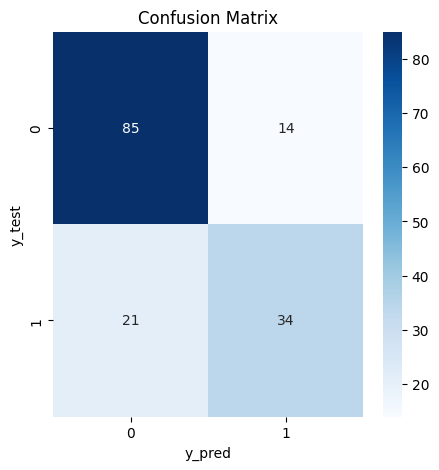

In [ ]:
plt.figure(figsize=(5, 5))
sns.heatmap(result, annot=True, fmt='d', cmap='Blues')
plt.xlabel('y_pred')
plt.ylabel('y_test')
plt.title('Confusion Matrix')
plt.show()


In [ ]:
score=accuracy_score(y_test,y_pred)
print("Accuracy Score")
score

Accuracy Score


0.7727272727272727

In [ ]:
report=classification_report(y_test,y_pred)
print("Classification Report")
print(report)


Classification Report
              precision    recall  f1-score   support

           0       0.80      0.86      0.83        99
           1       0.71      0.62      0.66        55

    accuracy                           0.77       154
   macro avg       0.76      0.74      0.74       154
weighted avg       0.77      0.77      0.77       154

